In [1]:
import pandas as pd
from diodem.utils import resample, crop_tail
import imt
import matplotlib.pyplot as plt
import numpy as np
import tree

In [2]:
acc1 = pd.read_csv("data/shoulder_tracking/chest.csv", sep=",", skiprows=11)[["Acc_X", "Acc_Y", "Acc_Z"]].to_numpy()
gyr1 = pd.read_csv("data/shoulder_tracking/chest.csv", sep=",", skiprows=11)[["Gyr_X", "Gyr_Y", "Gyr_Z"]].to_numpy()
mag1 = pd.read_csv("data/shoulder_tracking/chest.csv", sep=",", skiprows=11)[["Mag_X", "Mag_Y", "Mag_Z"]].to_numpy()
acc2 = pd.read_csv("data/shoulder_tracking/upperarm.csv", sep=",", skiprows=11)[["Acc_X", "Acc_Y", "Acc_Z"]].to_numpy()
gyr2 = pd.read_csv("data/shoulder_tracking/upperarm.csv", sep=",", skiprows=11)[["Gyr_X", "Gyr_Y", "Gyr_Z"]].to_numpy()
mag2 = pd.read_csv("data/shoulder_tracking/upperarm.csv", sep=",", skiprows=11)[["Mag_X", "Mag_Y", "Mag_Z"]].to_numpy()

acc1, gyr1, mag1, acc2, gyr2, mag2 = crop_tail((acc1, gyr1, mag1, acc2, gyr2, mag2), 60)
acc1, gyr1, mag1, acc2, gyr2, mag2 = resample((acc1, gyr1, mag1, acc2, gyr2, mag2), 60, 100)
gyr1, gyr2 = np.deg2rad(gyr1), np.deg2rad(gyr2)

`crop_tail`: Crop off at t=78.81666666666666s


In [3]:
solver = imt.Solver([-1, 0], 
                    methods=[imt.methods.VQF(offline=True), 
                     imt.wrappers.JointPosition(imt.methods.RNNO())], 
                     Ts=0.01)
qhat, extras = solver.step({
    0: dict(acc=acc1, gyr=gyr1), 1: dict(acc=acc2, gyr=gyr2)
})

/Users/simon/Documents/PYTHON/imt/src/imt/wrappers/_jpos.py:85: UserWarning: Found very large gyroscope or phi value of 10.14817241237181. Are you sure you have provided Gyroscope and `phi` value in radians?
  warnings.warn(


To save the video permanently, provide the path to where the .mp4 is  saved by specifying `offscreen_mode_options=dict(output_path=...)`



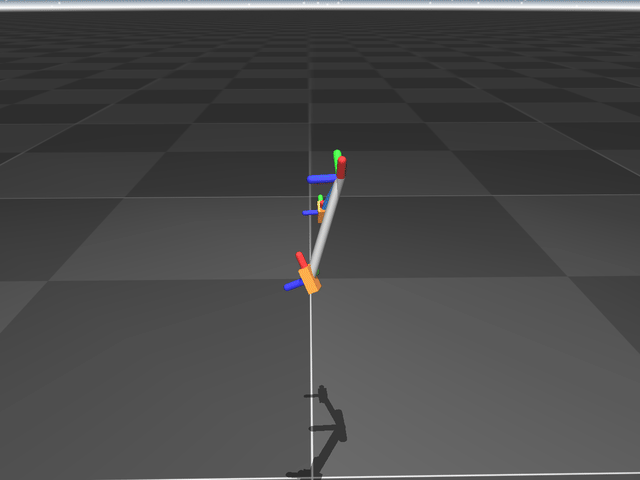

In [4]:
pos = np.zeros((1000, 3))
pos[:, 2] = 0.5
# show only the first 10 seconds
qhat = tree.map_structure(lambda a: a[:1000], qhat)
pos = np.zeros((qhat[0].shape[0], 3))
pos[:, 2] = 0.5
imt.utils.view([-1, 0], qhat, extras, 100, global_translation=pos, mode="offscreen", show_floor=True, width=640, height=480,
               offscreen_mode_options=dict(camid=1, github=True), show_every_nth_frame=5)